This is a notebook showing how to use different datasets

In [5]:
%pylab inline
import gzip, pickle
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 20


Populating the interactive namespace from numpy and matplotlib


## MNIST dataset

In [6]:

def load_mnist():
    f = gzip.open('data/mnist.pkl.gz', 'rb')
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    data = u.load()
    f.close()
    return data

(x_train, t_train), (x_valid, t_valid), (x_test, t_test) = load_mnist()

The tuples represent train, validation and test sets. The first element (`x_train`, `x_valid`, `x_test`) of each tuple is a $N \times M$ matrix, where $N$ is the number of datapoints and $M = 28^2 = 784$ is the dimensionality of the data. The second element (`t_train`, `t_valid`, `t_test`) of each tuple is the corresponding $N$-dimensional vector of integers, containing the true class labels.

Here's a visualisation of the first 8 digits of the trainingset:

8
2


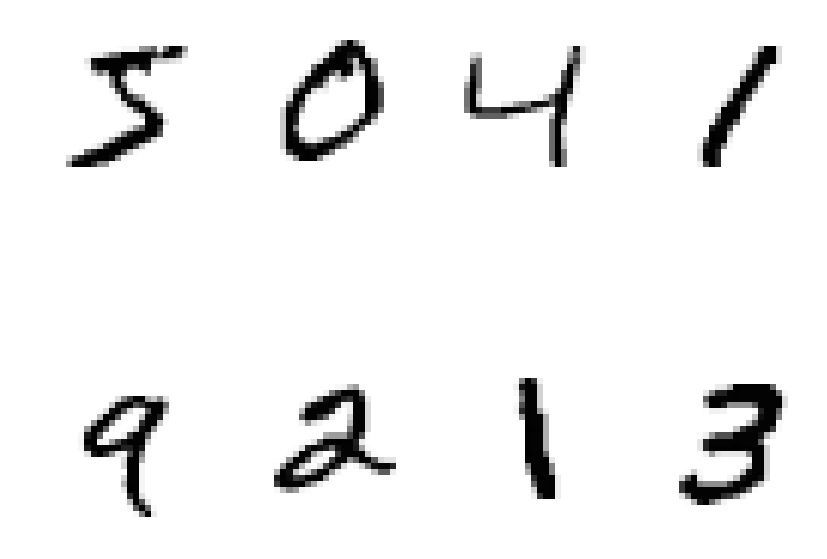

In [7]:
def plot_digits(data, numcols, shape=(28,28)):
    numdigits = data.shape[0]
    numrows = int(numdigits/numcols)
    print(numdigits)
    print(numrows)
    for i in range(numdigits):
        plt.subplot(numrows, numcols, i+1)
        plt.axis('off')
        plt.imshow(data[i].reshape(shape), interpolation='nearest', cmap='Greys')
    plt.show()
        
plot_digits(x_train[0:8], numcols=4)

## CIFAR 10 dataset

In [8]:
from data.cifar10_utils import get_cifar10_raw_data, preprocess_cifar10_data
from data.cifar10_utils import transform_label_encoding_to_one_hot


In [9]:
X_train_raw, Y_train_raw, X_test_raw, Y_test_raw = get_cifar10_raw_data(
    '/home/derkjan/Documents/academics_UVA/master_thesis/data/cifar10/cifar-10-batches-py'
)

#Checking shapes, should be (50000, 32, 32, 3), (50000, ), (10000, 32, 32, 3), (10000, )
print('Train data shape: {}'.format(X_train_raw.shape))
print('Train labels shape: {}'.format(Y_train_raw.shape))
print('Test data shape: {}'.format(X_test_raw.shape))
print('Test labels shape: {}'.format(Y_test_raw.shape))
#Y_train_raw, Y_test_raw have values ranging from 0 to 9

Train data shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


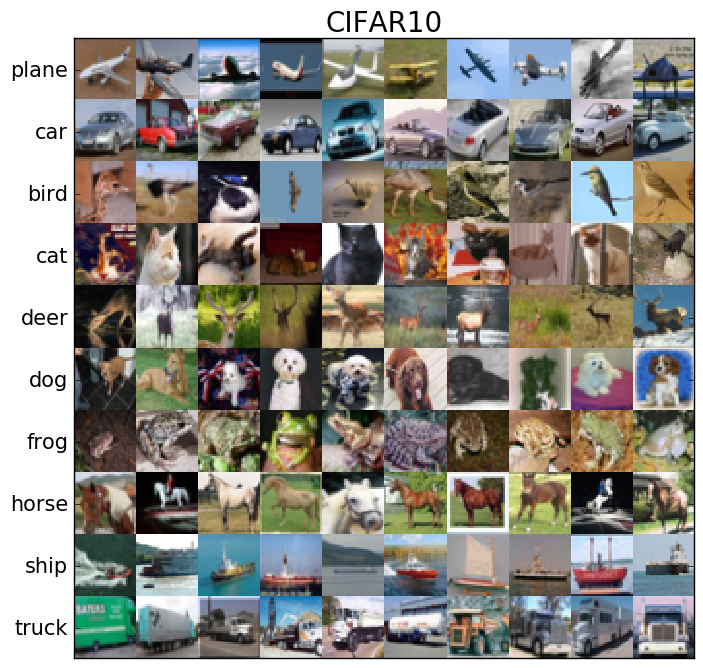

In [10]:
# Visualize CIFAR10 data
samples_per_class = 10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_classes = len(classes)
can = np.zeros((320, 320, 3),dtype='uint8')
for i, cls in enumerate(classes):
    idxs = np.flatnonzero(Y_train_raw == i) 
    idxs = np.random.choice(idxs, samples_per_class, replace = False)
    for j in range(samples_per_class):
        can[32 * i:32 * (i + 1), 32 * j:32 * (j + 1),:] = X_train_raw[idxs[j]]
plt.xticks([], [])
plt.yticks(range(16, 320, 32), classes)
plt.title('CIFAR10', fontsize = 20)
plt.imshow(can)
plt.show()

In [11]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = preprocess_cifar10_data(
    X_train_raw, Y_train_raw, X_test_raw, Y_test_raw, num_val = 1000
)

#Checking shapes, should be (49000, 3072), (49000, ), (1000, 3072), (1000, ), (10000, 3072), (10000, ) 
print('Train data shape: {}'.format(X_train.shape))
print('Train labels shape: {}'.format(Y_train.shape))
print('Val data shape: {}'.format(X_val.shape))
print('Val labels shape: {}'.format(Y_val.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(Y_test.shape))

num_classes = 10
Y_train_one_hot = transform_label_encoding_to_one_hot(Y_train, num_classes)
Y_val_one_hot = transform_label_encoding_to_one_hot(Y_val, num_classes)
Y_test_one_hot = transform_label_encoding_to_one_hot(Y_test, num_classes)

print('Train labels one hot shape: {}'.format(Y_train_one_hot.shape))
print('Val labels one hot shape: {}'.format(Y_val_one_hot.shape))
print('Test labels one hot shape: {}'.format(Y_test_one_hot.shape))

Train data shape: (49000, 3072)
Train labels shape: (49000,)
Val data shape: (1000, 3072)
Val labels shape: (1000,)
Test data shape: (10000, 3072)
Test labels shape: (10000,)
Train labels one hot shape: (49000, 10)
Val labels one hot shape: (1000, 10)
Test labels one hot shape: (10000, 10)


## Geometrical shapes

In [12]:
from code import generate_data as generator
import matplotlib.pyplot as plt

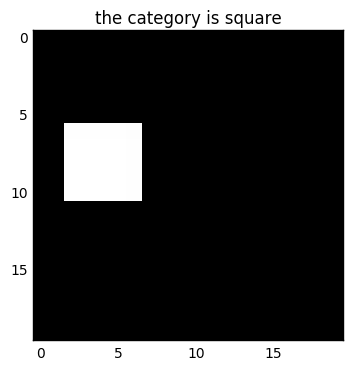

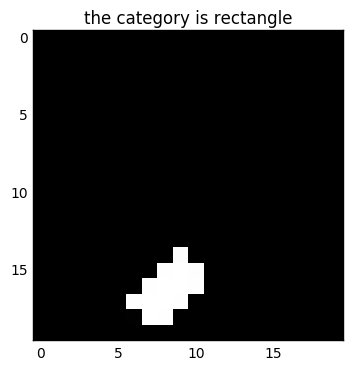

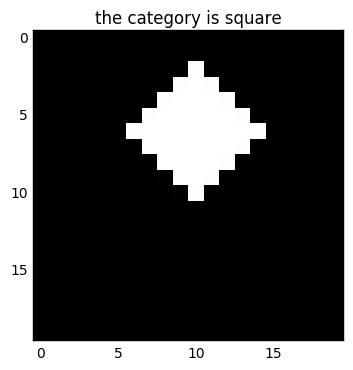

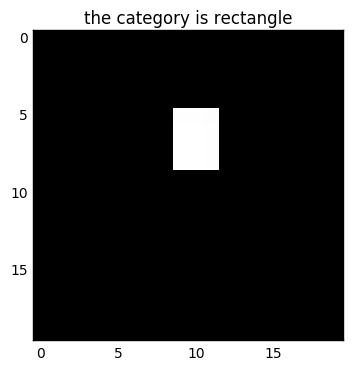

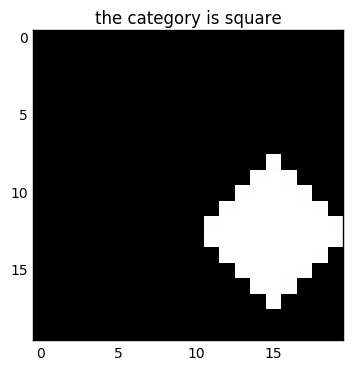

In [3]:
grid_len, grid_width = 20, 20
sample_size = 5 

gen = generator.GenerateData(grid_len, grid_width, add_noise=False, params=None)

X_samples, y_samples = gen.generate_batch_samples(batch_size=sample_size)

for count, sample in enumerate(X_samples):
    picture = np.reshape(sample, (grid_len, grid_width))
    plt.imshow(picture, cmap='bone', interpolation='none')
    cat = 0
    for i, entry in enumerate(y_samples[count]):
        if entry ==1 :
            cat = i

    plt.title("the category is {}".format(gen.category_li[cat]))
    plt.show()